# Tensorflow tutorial
I will follow the tutorial and write my notes along with this. This notebook is about the different functionalities in tensorflow library. I will then open a more notebook with my personal training.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Additional libraries I will use
from random import seed
from random import randint
seed(1)

# import Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The different variables are the training set (images + label, marked between 0 and 9) and the test set.
Labels: 
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

We store these to use later (for plotting):

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle boot']

There are 60'000 images in the training set, and 10'000 in the test set. Each image is 28x28 pixels. 

## Preprocessing
Let's start looking at the data! Start by printing a random image... (turorial here prints first element)

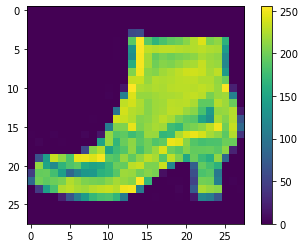

In [6]:
printed = randint(0, train_images.shape[0]-1)
plt.figure()
plt.imshow(train_images[printed])
plt.colorbar()
plt.grid(False)
plt.show()

Pixels in each image fall within 0 and 255! We want to normalize values for the neural network model, then print a subset of images. 

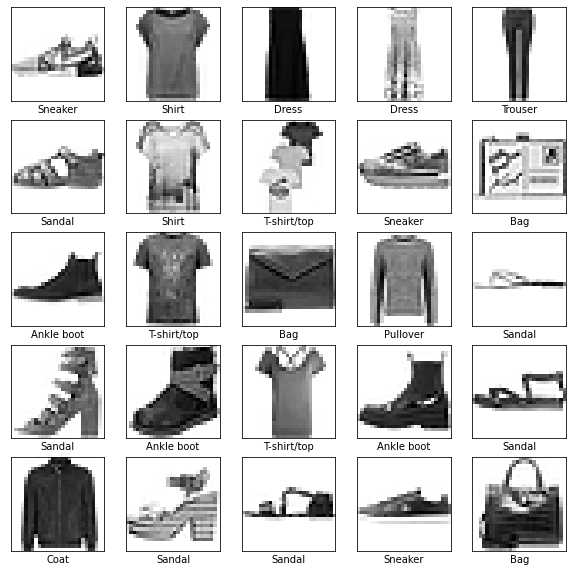

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    printed = randint(0, train_labels.shape[0])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[printed], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[printed]])
plt.show()

(note to self: in my dark mode, I do not see labels in the picture, but when expanding it, they show.)

## Time to build the model!
First we will need to set up the layers of the model, then compile it. The layers in tf.keras.Sequential are:
1. Flatten: this layer transforms the 28x28 pixel image into a one-dimensional array (unstacking the rows)
2. Dense: dense layers are "fully connected neural layers" and they basically reduce the dimensionality of the data from one layer to the next. In this case, there are two dense functions
    1. This Dense layer has 128 nodes (neurons)
    2. The final output has 10 nodes, each containing a score that indicates that the image belongs to one of the 10 classes. 

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

We need more steps to get the model ready for training:
- loss function
- optimizer (way in which the model is optimized based on the data and loss function)
- metrics (used to monitor the training and the test, e.g. accuracy measured as percentage of images correctly classified)
These steps are added in the compile step.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

After these steps we are now ready to train the model!

## Train the model
The first step is to fit the model to the training data:


In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3258 - accuracy: 0.8838
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3236 - accuracy: 0.8848
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3219 - accuracy: 0.8850
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3195 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3183 - accuracy: 0.8865
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3162 - accuracy: 0.8872
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3148 - accuracy: 0.8880
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8888
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3113 - accuracy: 0.8889
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.308

This model trains to an accuracy of about 89% (slighlty lower than the Tensorflow tutorial at 91%). Playing with the number of epochs ran, it seems that we are close to a limit here. Loss function is still a bit higher than in the official tutorial. Let us see how it fares when evaluating on the test set.

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3712 - accuracy: 0.8671 - 508ms/epoch - 2ms/step

Test accuracy: 0.8671000003814697


The small gap between accuracy in the trained model and the evaluation on test data is a little bit of overfitting. 

## Predictions
We can now make predictions about some images! The idea is to add a layer to convert the model's outpus to probabilities. This layer is called "softmax".

In [20]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


The output of this function is an two-dimensional array with each array being 10 probabilities, that is a probability of each picture to be assigned to each of the categories. Let's look at the set of class predictions.

In [26]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid()
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'tab:blue'
    else:
        color = 'tab:red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('tab:red')
    thisplot[true_label].set_color('tab:blue')

Time now to verify visually our predictions! 

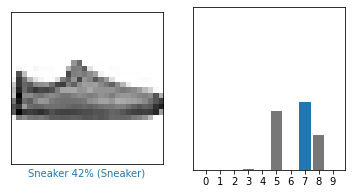

In [36]:
i = randint(0, test_labels.shape[0])
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

Let us plot X random test images to see more examples.

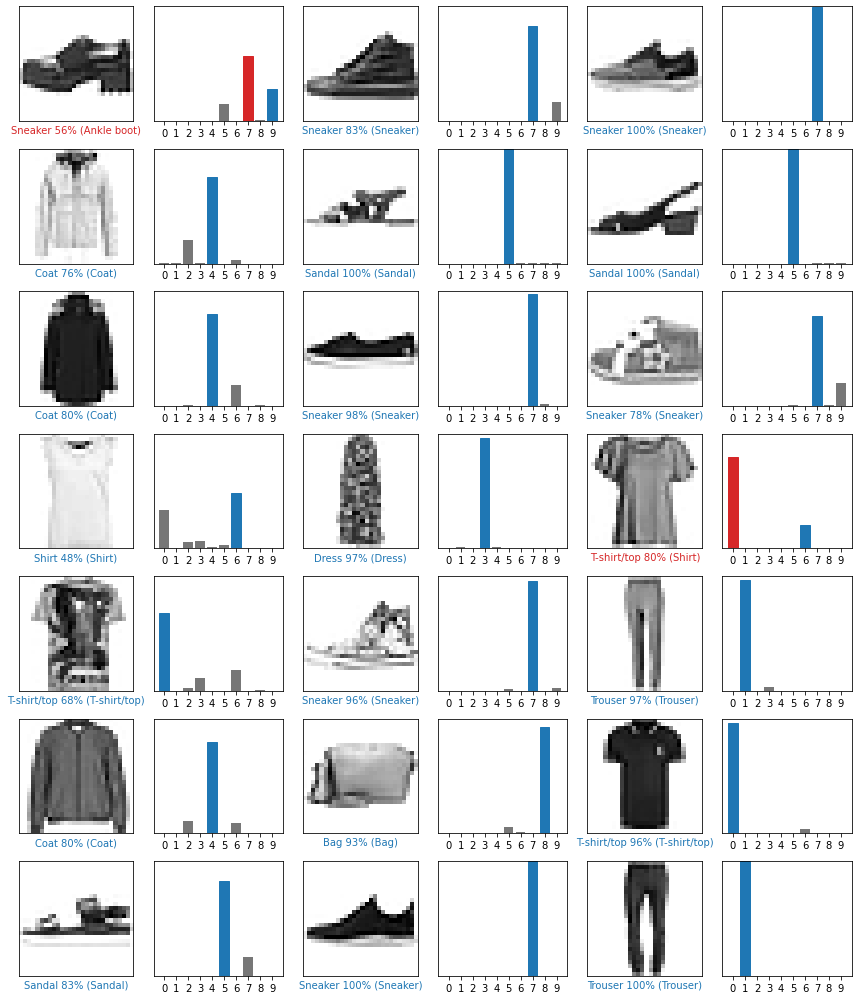

In [39]:
num_rows = 7
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    showed = randint(0, test_labels.shape[0])
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(showed, predictions[showed], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(showed, predictions[showed], test_labels)
plt.tight_layout()
plt.show()

## Using the trained model
We grab an image at random from the dataset. tf.keras is optimized to work on "batches", thus we need to set the image as being a collection of objects. The final shape of the object "img" in this example will be 1x28x28.

1/1 [==============================] - 0s 26ms/step


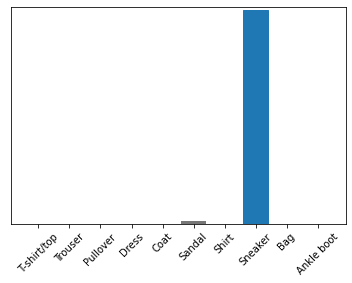

In [50]:
showed = randint(0, test_images.shape[0])
img = test_images[showed]
img = (np.expand_dims(img, 0))

predictions_single = probability_model.predict(img)

plot_value_array(showed, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

This is the end of the basic tutorial. 